# Lab Class Week 6

## Vectors

First we go through a few quick examples using vectors.


## Tasks 

- Create a 1D vector and assign it some values, then print them out.
- Try using the vector functions (look them up on the web), such as:
~~~
cout << V.size();
V.clear();
V.resize(2);
~~~
- Create a 2D vector and assign it some values, then print them out.
- Practice assigning values to the vector and performing calculations on it (e.g. find the average of all the elements).
- Try writing a function that takes a vector as an argument.

In [1]:
#include <vector>
#include <iostream>
#include <cmath>
using namespace std;

In [2]:
{
    vector<double> v(4);
    v[0] = 1.;
    v[1] = 5.;
    v[2] = 8.;
    v[3] = 4.;
    
    cout << " v:= [ "<<v[0];
    for(int i=1;i<4;i++)cout << " , "<<v[i];
    cout << " ]" << endl;
}

 v:= [ 1 , 5 , 8 , 4 ]


Rewrite the code above with some vector functions

In [3]:
{
    // create an empty vector
    vector<double> v;
    // resize it to 4
    v.resize(4);
    // assign some values
    v[0] = 1.;
    v[1] = 5.;
    v[2] = 8.;
    v[3] = 4.;
    
    cout << " v:= [ "<<v[0];
    // use size of vector in loop
    for(int i=1;i<v.size();i++)cout << " , "<<v[i];
    cout << " ]" << endl;
}

 v:= [ 1 , 5 , 8 , 4 ]


Now create a matrix $A$.

In [4]:
{
    // create a 5x4 matrix A
    vector<vector<double>> A(5,vector<double>(4));
    // assign some values
    for(int i=0;i<A.size();i++)
    {
        for(int j=0;j<A[i].size();j++)
        {
            A[i][j] = 10*(i+1) + j+1;
        }
    }
    
    cout << " A:= "<<endl;
    // use size of vector in loop
    // assign some values
    for(int i=0;i<A.size();i++)
    {
        cout << " ( " << A[i][0];
        for(int j=1;j<A[i].size();j++)cout << " " << A[i][j];
        cout << " ) " << endl;
    }
    cout << endl;
}

 A:= 
 ( 11 12 13 14 ) 
 ( 21 22 23 24 ) 
 ( 31 32 33 34 ) 
 ( 41 42 43 44 ) 
 ( 51 52 53 54 ) 



In [5]:
{
    // create an empty vector
    vector<double> v(4);
    // assign some values
    v[0] = 1.;
    v[1] = 5.;
    v[2] = 8.;
    v[3] = 4.;
    
    // calculate the average
    double sum=0.;
    // use size of vector in loop
    for(int i=0;i<v.size();i++)
        sum = sum + v[i];
    cout << " vector average := " << sum/v.size() << endl;
    
}

 vector average := 4.5


Functions that take vectors as arguments should be written either as
~~~
double calculatePayoff(const vector<double> &St, ...){ ....
~~~
if `St` should not be changed in the function or
~~~
void generatePath(vector<double> &St, ...){ ....
~~~
if you want the values of `St` to be changed. 

You should avoid writing
~~~
void calculateAverage(vector<double> v){ ....
~~~
as this will copy the contents of the vector to a new vector inside the function, which can take a lot of time. Such operations are the default in many scripting languages such as "r" which is why they are so inefficient. 

In [6]:
double calculateAverage(const vector<double> &v)
{
    // calculate the average
    double sum=0.;
    // use size of vector in loop
    for(int i=0;i<v.size();i++)
        sum = sum + v[i];
    return sum/v.size();
}

In [7]:
{
    // create an empty vector
    vector<double> v(4);
    // assign some values
    v[0] = 1.;
    v[1] = 5.;
    v[2] = 8.;
    v[3] = 4.;
    
    cout << " vector average := " << calculateAverage(v) << endl;

}

 vector average := 4.5


## Path Dependent Options

Assume that the stock price $S_t$ is observed over $K+1$ equally spaced intervals $t_0,t_1,\dots,t_K$ with $t_0=0$ and $t_K=T$. Now let us solve the value of a path dependent option where
we define the underlying asset $A$ to be the average absolute movements in the share price over several periods such that
$$
A = \frac{\sum_{i=1}^K | S(t_i) - S(t_{i-1}) |}{\sqrt{K}} .
$$
Assuming the Black Scholes framework under the risk neutral measure, and we wish to price a call option with payoff 
$$
C(A,S,t=T)=\max(A-X,0).
$$ 


Find the value
$$
C(S_0,t=0) = e^{-rT} E^Q[\max(A-X,0)]
$$
- where $K=20$, strike price $X=30$ and a maturity $T=1$ is one year from now;
- the current stock price is $S_0=104.81$;
- the stock price follows a GBM with $\sigma=0.4$, the interest rate is $r=0.03$.

In [8]:
#include <iostream>
#include <iomanip>
#include <cmath>
#include <vector>
#include <fstream>
#include <random>
#include <algorithm>
using namespace std;

In [9]:
#include "math60082_lab_plot_loader.hpp"

In [10]:
double callOption(double S0, double  sigma, double  r, double  T, double  X,int K,int N)
{
    static mt19937 rng;
    normal_distribution<> ND(0., 1.);
    double sum = 0.;
    for (int n = 0; n < N; n++)
    {
        // now create a path
        double dt = T / K;
        vector<double> stockPath(K + 1);
        stockPath[0] = S0;
        for (int i = 1; i <= K; i++)
        {
            double phi = ND(rng);
            stockPath[i] = stockPath[i - 1] * exp((r - 0.5*sigma*sigma)*dt + phi*sigma*sqrt(dt));
        }
        // and calculate A
        double A = 0.;
        for (int i = 1; i <= K; i++)
        {
            A = A + fabs(stockPath[i] - stockPath[i - 1]);
        }
        A = A/sqrt(K);
        // add in the payoff to the sum
        sum = sum + max(A - X, 0.);
    }
    return sum / N*exp(-r*T);
}


## Tasks
- Try running this code with different values of $N=100,200,...$, what happens?
- Choose a large enough value of $N$, what happens when you choose different values of $K$?
- For a fixed value of $K$, can you estimate the value **and** the accuracy of your result? (Hint: look at lab class 3)
- Try making $A$ the average or the maximum/minimum value -- what happens to the option value?

In [11]:
{
    double S0 = 104.81, sigma = 0.4, r = 0.03, T = 1, X = 30.; 
    int K = 20;
    for(int N = 100;N<=2000;N+=100)
        cout << "Call Option = " << callOption(S0, sigma, r, T, X, K, N) << endl;
}

Call Option = 5.96243
Call Option = 6.16377
Call Option = 4.96189
Call Option = 5.20838
Call Option = 5.59273
Call Option = 5.56982
Call Option = 5.73064
Call Option = 5.54928
Call Option = 5.72325
Call Option = 5.61358
Call Option = 5.93575
Call Option = 5.5347
Call Option = 6.00951
Call Option = 5.60477
Call Option = 5.83018
Call Option = 5.4336
Call Option = 6.0845
Call Option = 5.63171
Call Option = 5.60319
Call Option = 5.79822


We get results that look like a normal distribution again. Hopefully this means that 

$$
V_N \sim N\left( V* , \frac{\nu^2}{N} \right)
$$

again where $V_N$ is our Monte Carlo estimate with $N$ paths, $V*$ is the analytic solution and $\frac{\nu^2}{N}$ is a variance we can estimate. Let's plot it out.

In [12]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-6-1.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0 = 104.81, sigma = 0.4, r = 0.03, T = 1, X = 30.; 
    int K = 20;
    for(int N=10;N<=1000;N++)
    {
        output << N << " , " << callOption(S0, sigma, r, T, X, K, N) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


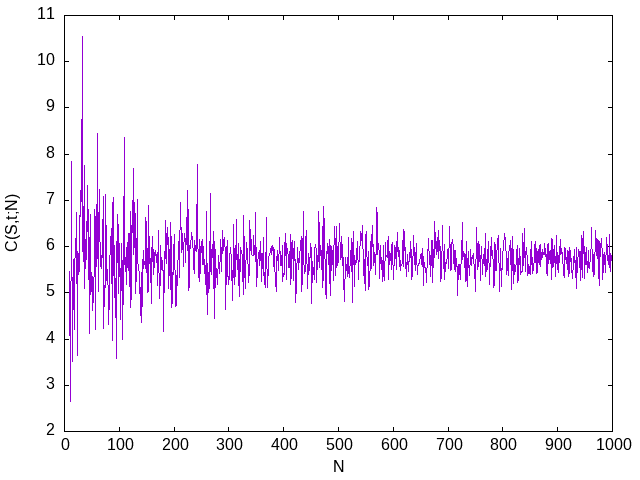

In [13]:
MATH60082::gnuplotImage fig1;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'C(S,t;N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-6-1.csv' u 1:2 w l";
    fig1 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig1

Now lets choose a large value of $N$, what effect does the number of observations $K$ have on our solution?

In [14]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-6-2.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs C(S0,t=0,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    double S0 = 104.81, sigma = 0.4, r = 0.03, T = 1, X = 30.; 
    int N = 100000;
    for(int K=1;K<=25;K++)
    {
        output << K << " , " << callOption(S0, sigma, r, T, X, K, N) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


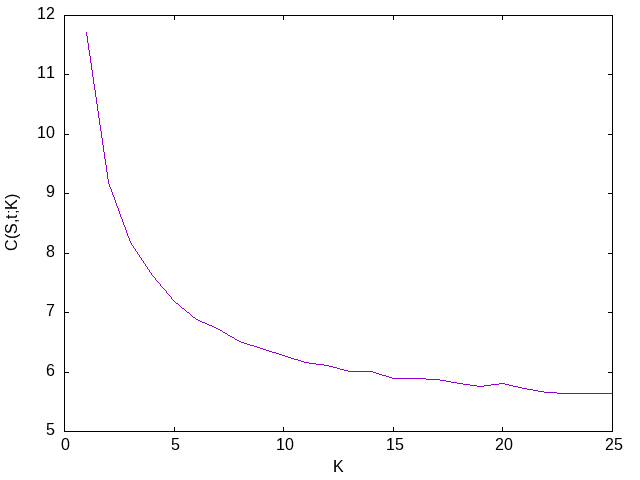

In [15]:
MATH60082::gnuplotImage fig2;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'K'" << endl;
    ss << "set ylabel 'C(S,t;K)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-6-2.csv' u 1:2 w l";
    fig2 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig2

We see the results appear to be converging for larger values of $K$, this could be investigated if we have more time.

And in a similar way as before, for fixed $K$, we can estimate the variance of the option price and hence get a confidence interval.

In [16]:
{
    double S0 = 104.81, sigma = 0.4, r = 0.03, T = 1, X = 30.; 
    int K = 20;
    
    // run the code 100 times and take the average, like taking N*M paths
    int M=100;

    // number of paths in each calculation
    int N=1000;

    cout << " ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"<<endl;
    cout << " Run results with M="<<M<<" samples from V_N, where N="<<N<<"."<<endl;

    // estimate the mean and variance from the sample
    double sum=0.;
    double sumSq = 0.;
    for(int i=0;i<M;i++)
    {
        double value = callOption(S0, sigma, r, T, X, K, N) ;
        sum+=value;
        sumSq+=value*value;
    }
    double mean = sum/M;
    double variance = sumSq/M - mean*mean;
    cout << " variance = " << variance << endl; 

    // get the standard deviation of the sample mean
    cout << " variance of the sample mean = " << variance/M << endl; 
    double sd = sqrt(variance/M);
    cout << " 95% confident result is in ["<<mean-2.*sd << "," << mean+2.*sd << "] with "<< N*M << " total paths." << endl;

}

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 Run results with M=100 samples from V_N, where N=1000.
 variance = 0.0756966
 variance of the sample mean = 0.000756966
 95% confident result is in [5.73231,5.84236] with 100000 total paths.
